 [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ULPGC-GTMA/ULPGC-TIV/blob/main/Tema_1a.ipynb)

 Si el *notebook* se ejecuta en Google Colab hay que recordar crear una carpeta *images* en dicho entorno y subir a la misma las imágenes con las que se vaya a experimentar. En la versión que se distribuye de este *notebook* hay que subir images/chinche_L.png.

 Si bien hay varias opciones para crear la carpeta y subir los ficheros, lo más sencillo y apropiado para la asignatura es buscar el icono de carpeta en el lado izquierdo de la ventana para abrir una vista de archivos. Entonces uede crearse la carpeta fácilmente en Colab. Para subir los archivos, previamente deben descargarse, a mano, desde GitHub al ordenador local y desde éste subirlo a la carpeta recién creada en Colab. Puede resultar necesario actualizar la vista.

# Tema 1: Introducción a las Tecnologías de la Imagen

## Procesado de Imágenes con Python (a)

Python es un lenguaje de programación potente y fácil de utilizar. Tiene estrucuturas de datos de alto nivel eficientes y un modelo de programación orientado a objetos simple y efectivo. Al tratarse de un lenguaje interpretado es ideal para realizar *scripts* y para el desarrollo rápido de aplicaciones. Por todo ello es tan popular en muchos campos de aplicación y, en particular, en distintas ramas de la ingeniería y de la ciencia.

Cuando decimos **Python** nos referimos básicamente a dos componentes:
* El lenguaje de programación, actualmente en su versión 3.X
* La librería estándard, que complementa el lenguaje con una enorme funcionalidad. Es a lo que sus desarrolladores se refieren cuando dicen que Python viene con las *pilas incluidas*.

Si lo deseas, puedes ampliar la información en el [Tutorial de Python](https://docs.python.org/es/3.9/tutorial/index.html).

Además, lógicamente se necesita un intérprete del lenguaje que pueda ejecutar sus sentencias. Nosotros vamos a utilizar el [ecosistema Jupyter](https://jupyter.org/) que utiliza un intérprete denominado [iPython](https://ipython.org/), que añade mucha funcionalidad al intérpreto estándar de Python, por ejemplo facilitando la gestión de contenidos gráficos. Ello permite que pueda ejecutarse y visualizarse el código de Python en un *notebook* como éste que estás leyendo.

A pesar de la potencia del lenguaje Python y de su librería estándar, mucha funcionalidad debe apoyarse en paquetes de software adicionales, que se integran fácilmente en Python. De hecho, Python apenas cuenta con funcionalidad para trabajar con imágenes y por ello se desarrolló [PILLOW](https://pillow.readthedocs.io/en/latest/handbook/overview.html), esto es, la *Python Imaging Library*, que es capaz de gestionar muchos formatos de imágenes, cuenta con una reseñable capacidad de procesado y es, además, muy eficiente. Sin embargo, [PILLOW](https://pillow.readthedocs.io/en/latest/handbook/overview.html) no añade funcionalidad de visualización de imágenes a la disponible en la librería estándar, que es muy pobre y limitada a un paquete denominado [tkinter](https://docs.python.org/es/3.9/library/tk.html). Afortunadamente, iPython y Jupyter van a ayudarnos, como veremos seguidamente.

### PILLOW (y un breve repaso de orientación a objetos)

Veamos primero algunas cosas que podemos hacer con [PILLOW](https://pillow.readthedocs.io/en/stable/), que es un [paquete](https://docs.python.org/es/3/tutorial/modules.html#packages) de Python denominado PIL (Python Image Library) por razones históricas (realmente PILLOW es un *fork* del sistema PIL inicial, que dejó de desarrollarse y ha sido sustituido por PILLOW). 

Los [módulos](https://docs.python.org/es/3/tutorial/modules.html#) de PILLOW deben de importarse en el espacio de nombres local para que el intérprete los pueda localizar.

Python es un lenguaje orientado a objetos y, de hecho, en Python, **todo es un objeto** y, por tanto, instancias de **clases**. De hecho, tanto los paquetes como los módulos son objetos.

Algunos conceptos preliminares importantes relativos a la orientación a objetos de Python:
* Objetos: abstracción de datos. Se caracterizan por tener:
   * Atributos o propiedades
   * Métodos (lo que pueden hacer)
* Cada objeto Python tiene
   * Identidad o ID: `id(objeto)`. <u>Identificador único que nunca cambia</u> tras crearse el objeto
   * Tipo: `type(a)`. Determina qué <u>valores y operaciones son admisibles</u>. Nunca cambia
   * Valor. Una vez creado el objeto, su valor sólo puede cambiar si es **mutable**. Muchos objetos son **inmutables**.
* **Nombres**: refieren objetos mediante operaciones que vinculan los objetos con sus nombres. Es una abstracción semejante a la de *variable* en otros lenguajes. **No confundir el nombre con el objeto**. De hecho, pueden asociarse varios nombres a un único objeto.
  * `del` elimina el vínculo entre el nombre y el objeto. Cuando un objeto no tiene ninguna referencia a un nombre, Python lo elimina de la memoria mediante un proceso denominado recogida de basura (*garbage collection*).


Importaremos el módulo [PIL.Image](https://pillow.readthedocs.io/en/stable/reference/Image.html), que proporciona la clase *Image* para representar las imágenes PIL, con atributos y métodos de los objetos de clase Image. Además, también proporciona algunas funciones (objetos también, como todo en Python) de fábrica o factoría, esto es, objetos que se utilizan para crear otros objetos, tales como funciones para cargar imágenes desde los ficheros o para crear nuevas imágenes.

In [1]:
from PIL import Image

print(type(Image)) # Objeto de clase module

<class 'module'>


Utilizamos la función de factoría del módulo [Image.open()](https://pillow.readthedocs.io/en/stable/reference/Image.html#functions) para leer un fichero .png y crear un nuevo objeto de clase *Image* con el que vamos a trabajar, dándole un nombre que lo referencia. Además, tiene un identificador único, atributos y métodos. 

Las cadenas de caracteres, como la que utilizamos en el nombre del fichero, son también objetos, en este caso, de clase [str](https://docs.python.org/es/3/tutorial/introduction.html#strings) (*string*). Se trata de un objeto (la cadena) que es una **secuencia** de otros objetos (los caracteres, que realmente son cadenas con un único elemento) que, además, es **inmutable**, esto es, las cadenas, una vez creadas en memoria no las podemos modificar, sino que hay que crear otras nuevas que las sustituyan si queremos modificarlas. Veremos más adelante otros tipos de secuencias como las **tuplas**, que también son inmutables, y las **listas**, que son **mutables**.

Por cierto, los **números** son también objetos **inmutables**, y los hay de varias clases: enteros, reales, complejos y booleanos.

In [2]:
file = 'images/chinche_L.png'
print(type(file))
print(id(file))

img  = Image.open(file)
print(type(img))
print(id(img))

<class 'str'>
2650092262448
<class 'PIL.PngImagePlugin.PngImageFile'>
2650089370400


Ya hemos comentado que **PILLOW** tiene muy escasa funcionalidad gráfica. Sin embargo Jupyter y el intérprete iPython, sí que la tienen, y pueden gestionar los objetos *Image* de PILLOW. Para ello se utiliza la función [display](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#functions) del módulo *display* del paquete iPython, que ya está integrada en el intérprete, por lo que no tenemos que importarla. Es más, el intérprete normalmente va a detectar si un objeto es directamente visualizable sin necesidad, ni siquiera, de llamar expresamente a la función, aunque ahora sí lo haremos para mostrarla. Además, la función puede utilizar distintos parámetros, mientras que si invocamos directamente el objeto, tan solo puede utilizarse con los valores por defecto.

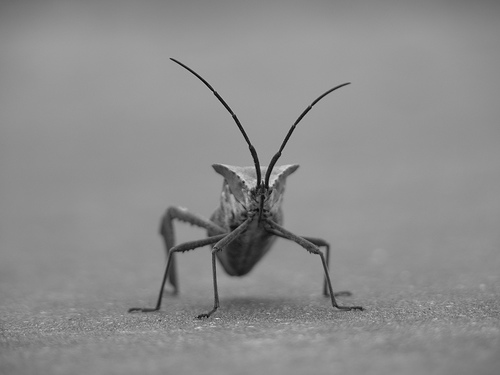

In [3]:
display(img)

Podemos ahora investigar [atributos](https://pillow.readthedocs.io/en/stable/reference/Image.html#image-attributes) del objeto de clase [Image](https://pillow.readthedocs.io/en/stable/reference/Image.html#the-image-class). Por ejemplo, el [formato](https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html), que en este caso es PNG, el [tamaño](https://pillow.readthedocs.io/en/stable/handbook/concepts.html#size) (ancho, alto) en píxels y el [modo](https://pillow.readthedocs.io/en/stable/handbook/concepts.html#modes), que en este caso es L, esto es, imagen en niveles de gris con 8 bits por píxel:

In [4]:
print('formato:', img.format)
print('(ancho, alto) =', img.size)
print('modo: ', img.mode)

formato: PNG
(ancho, alto) = (500, 375)
modo:  L


El atributo *Image.size* es una [tupla](https://docs.python.org/es/3/tutorial/datastructures.html#tuples-and-sequences), esto es, una secuencia **inmutable** de objetos, en este caso de números enteros, aunque podrían ser los distintos elementos de la tupla de distintas clases.

Podemos acceder a los elementos de una secuencia (cadenas, tuplas o listas) indexándolas.

In [5]:
print(type(img.size))
print('ancho: ', img.size[0], '\t', type(img.size[0]),
      '\n','alto: ', img.size[1],  '\t', type(img.size[1]))

<class 'tuple'>
ancho:  500 	 <class 'int'> 
 alto:  375 	 <class 'int'>


Los objetos de clase *Image* tienen también [métodos](https://pillow.readthedocs.io/en/stable/reference/Image.html#the-image-class). Tenemos, por ejemplo, entre muchos otros, un **método**, que nos devuelve una **tupla** con el nombre las bandas de un objeto de clase *Image*. 

Por cierto, ¿recuerdas qué son atributos y métodos en programación orientada a objetos?

In [6]:
print(type(img.getbands))
print(img.getbands())

<class 'method'>
('L',)


#### Pero qué es una imagen...

Podemos ver que una imagen en niveles de gris es esencialmente una función (nivel de gris) de dos variables (posición horizontal, posición vertical). En una computadora tenemos discretizadas todas las variables. En nuestra imagen de ejemplo tenemos:
- 256 niveles de gris, representados en una palabra de 8 bits para cada píxel (0 a 255). Es el modo L.
- El número de posiciones horizontales y verticales indicadas en (ancho, alto), numeradas desde (0, 0) a (ancho-1, alto-1)

Cada píxel es un pequeño rectángulo que podemos interpretar como el resultado de muestrear espacialmente la señal en un punto y mantener el nivel de gris constante en el área del rectángulo. El área de cada píxel es, por tanto, de (1 unidad de anchura x 1 unidad de altura) y el nivel de gris se mantiene constante dentro de la misma. 

Para localizar los píxels en el plano de la imagen necesitamos tener un sistema de referencia. Cuando trabajamos con imágenes, generalmente, el origen del sistema de referencia, la coordenada (0, 0), se refiere a la esquina superior izquierda de la imagen, de modo que cada píxel tiene:
- la esquina superior izquierda en \[posición vertical, posición horizontal\], en unidades de anchura y altura
- la esquina superior derecha en (posición vertical+1, posición horizontal+1), en unidades de anchura y altura
- El centro en (posición vertical+0.5, posición horizontal+0.5), en unidades de anchura y altura

En cualquier caso, hay que tener mucho cuidado con el sistema de referencia y el orden de las coordenadas que utiliza cada sistema e, incluso, cada componente del software pues pueden cambiar y, de hecho, es habitual que lo hagan.

**PILLOW** nos permite hacer programáticamente las operaciones que haríamos con un paquete de edición gráfica de imágenes, de forma que podemos hacer nuestros propios *scripts* automatizados de procesado, por ejemplo, para aplicar nuestros propios filtros y transformaciones.

Como dice el refrán que *una imagen vale más que mil palabras*, vamos a ponerlo en práctica:

#### Recorte y reescalado de imagen

Utilicemos ahora el método [Image.crop()](https://pillow.readthedocs.io/en/stable/handbook/tutorial.html#cutting-pasting-and-merging-images). Tiene como parámetro una tupla cuyos cuatro componentes son enteros referidos a las esquinas superior izquierda e inferior derecha del rectángulo de recorte.

(ancho, alto) = (250, 275)


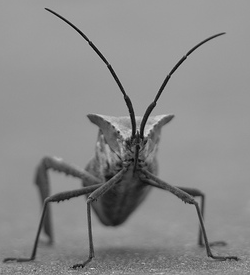

In [7]:
x_i = 125 # posición horizontal esquina superior izquierda 
y_i = 50  # posición vertical esquina superior izquierda
x_f = 375 # posición horizontal esquina inferior derecha
y_f = 325 # posición vertical esquina inferior derecha
img_recorte = img.crop((x_i, y_i, x_f, y_f))
print('(ancho, alto) =', img_recorte.size)
img_recorte

¿Tal vez algo grande todavía? Hagámoslo más pequeño aplicando al objeto *Image* su método [reduce()](https://pillow.readthedocs.io/en/stable/reference/Image.html#the-image-class).

(ancho, alto) = (63, 69)


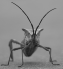

In [8]:
factor = 4
img_reduc = img_recorte.reduce(factor)
print('(ancho, alto) =', img_reduc.size)
img_reduc

¿Y si ampliamos la imagen para que tenga el mismo tamaño que la original? Su método [resize()](https://pillow.readthedocs.io/en/stable/handbook/tutorial.html#geometrical-transforms) nos resultará muy útil.

Advierte cómo la imagen resultante no tendrá posiblemente la calidad que esperabas. ¿A qué se debe? Experimenta con distintos valores de recorte. El pixelado y la pérdida de la relación de aspecto son dos problemas habituales al redimensionar las imágenes.

(ancho, alto) = (500, 375)


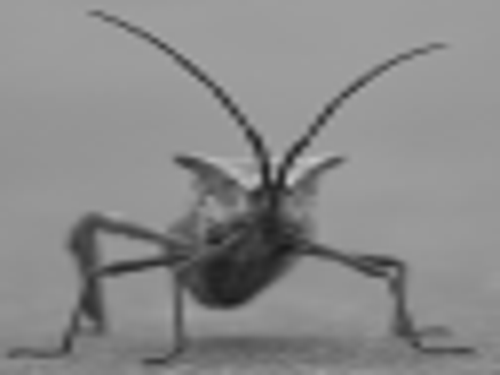

In [9]:
img_detalle = img_reduc.resize(img.size)
print('(ancho, alto) =', img_detalle.size)
img_detalle

#### Transformaciones geométricas

Comenzaremos con el método [Image.rotate()](https://pillow.readthedocs.io/en/stable/handbook/tutorial.html#geometrical-transforms):

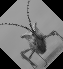

In [10]:
img_reduc.rotate(45)

Utilizaremos ahora los métodos de [transposición](https://pillow.readthedocs.io/en/stable/handbook/tutorial.html#transposing-an-image) para voltear la image fácilmente:

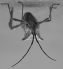

In [11]:
img_reduc.transpose(Image.Transpose.FLIP_TOP_BOTTOM)

Recortemos aún más la imagen recotada para que sea cuadrada

(ancho, alto) = (62, 62)


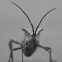

In [12]:
img_cuad = img_reduc.crop((0, 0, min(img_reduc.size)-1, min(img_reduc.size)-1))
print('(ancho, alto) =', img_cuad.size)
img_cuad

Podemos superponer imágenes con el método [Image.paste()](https://pillow.readthedocs.io/en/stable/handbook/tutorial.html#cutting-pasting-and-merging-images):

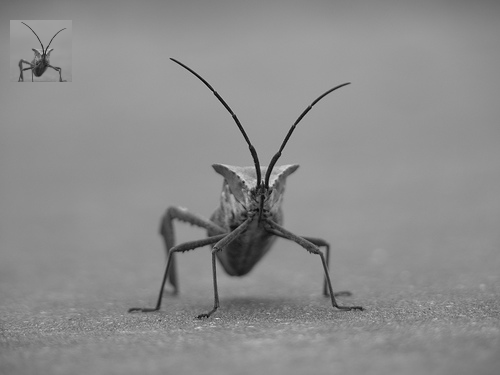

In [13]:
x_0 = 10 
y_0 = 20
img.paste(img_cuad, box = (x_0, y_0))
img

#### Secuencias de imágenes

Ahora haremos utilizaremos una lista de imágenes rotadas para hacer una **animación .gif**. Para ello debemos intruducir un nuevo objeto de secuencia, la [lista](https://docs.python.org/es/3/tutorial/introduction.html#lists), que es como la tupla pero **mutable**, esto es, la lista es una secuencia de objetos, que pueden ser de clases heterogéneas, que podemos modificar en memoria una vez definidas y que también podemos indexar para acceder a sus componentes.

En nuestro caso, tenemos una lista de objetos de clase *Image*, esto es, una secuencia de imágenes. Al ser la lista una secuencia mutable, podríamos cambiar las imágenes que la componen, pudiendo también, hacerla más corta o más larga. 

In [14]:
img_anim = [img_cuad, 
            img_cuad.transpose(Image.Transpose.ROTATE_90),
            img_cuad.transpose(Image.Transpose.ROTATE_180),
            img_cuad.transpose(Image.Transpose.ROTATE_270)]

Esta es una buena ocasión para introducir el bucle [for](https://docs.python.org/es/3/tutorial/controlflow.html#for-statements), habitual en los lenguajes de programación y útil para recorrer secuencias. No abuses de su uso, pues es muy ineficiente en lenguajes interpretados, como es el caso de Python. Veremos otras alternativas más adelante.

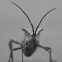

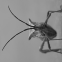

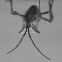

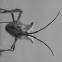

In [15]:
for i in [0, 1, 2, 3]:
     display(img_anim[i])

El método [save](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.save) de las instancias de la clase *Image* nos permite exportar en distintos formatos. Aquí lo utilizamos para exportar un .gif a partir de la cadena de imágenes que hemos creado.

In [16]:
duration = 300 # milisegundos que dura cada frame
img_anim[0].save("images/animation.gif", save_all=True, 
                 append_images=img_anim[1:],loop=0, duration=duration)

Ahora leemos el fichero .gif que acabamos de crear:

In [17]:
img_gif = Image.open("images/animation.gif")
print('formato:', img.format)
print('(ancho, alto) =', img.size)
print('modo: ', img.mode)
print('info adicional: ', img_gif.info)

formato: PNG
(ancho, alto) = (500, 375)
modo:  L
info adicional:  {'version': b'GIF89a', 'background': 0, 'loop': 0, 'duration': 300, 'extension': (b'NETSCAPE2.0', 795)}


El atributo [Image.info](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.info) nos proporciona una nueva estructura de datos, el [diccionario](https://docs.python.org/es/3/tutorial/datastructures.html#dictionaries). Se trata de un objeto mutable (podemos variar su contenido) que permite asociar claves con valores.

Ahora leemos el .gif animado para verlo en el Notebook. El gif queda almacenado en la caché del navegador, así que si se hacen cambios es necesario refrescarlo para volver a verlo. Estas limitaciones se superarán con herramientas más potentes de visualización que se verán más adelante.

<img src="images/animation.gif">

#### Imágenes en color

Creemos tres nuevas imágenes con unos rectángulos blancos en su interior. Son imágenes en niveles de gris, como las anteriores, pero que ahora solo toman los valores 0 (negro) y 255 (blanco)

formato: None
(ancho, alto) = (100, 100)
modo:  L


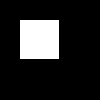

In [18]:
dim_img = (100, 100) # tamaño de las imágenes sucesivas del apartado

canal_R = Image.new("L", dim_img)
parche_R = (20, 20, 59, 59)
canal_R.paste(255, parche_R)
print('formato:', canal_R.format)
print('(ancho, alto) =', canal_R.size)
print('modo: ', canal_R.mode)
canal_R

formato: None
(ancho, alto) = (100, 100)
modo:  L


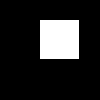

In [19]:
canal_G = Image.new("L", dim_img)
parche_G = (40, 20, 79, 59)
canal_G.paste(255, parche_G)
print('formato:', canal_G.format)
print('(ancho, alto) =', canal_G.size)
print('modo: ', canal_G.mode)
canal_G

formato: None
(ancho, alto) = (100, 100)
modo:  L


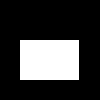

In [20]:
canal_B = Image.new("L", dim_img)
parche_B = (20, 40, 79, 80)
canal_B.paste(255, parche_B)
print('formato:', canal_B.format)
print('(ancho, alto) =', canal_B.size)
print('modo: ', canal_R.mode)
canal_B

Una imagen en color tiene tres canales
- R: rojo (red)
- G: verde (green)
- B: azul (blue)

La creamos combinando las tres anteriores, cada una como un canal, en una nueva imagen de modo RGB. Utilizamos para ello la función de factoría [Image.merge()](https://pillow.readthedocs.io/en/stable/handbook/tutorial.html#splitting-and-merging-bands) que nos permitirá crear un nuevo objeto de clase *Image* y modo RGB con dicha combinación de canales:

formato: None
(ancho, alto) = (100, 100)
modo:  RGB
bandas:  ('R', 'G', 'B')


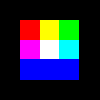

In [21]:
img_RGB = Image.merge("RGB", (canal_R, canal_G, canal_B))
print('formato:', img_RGB.format)
print('(ancho, alto) =', img_RGB.size)
print('modo: ', img_RGB.mode)
print('bandas: ', img_RGB.getbands())
img_RGB

Podemos también visualizar los canales en sus respectivos colores, creando una imagen RGB en la que los canales que no se utilizan se mantienen a cero y solo se utiliza el del color correspondiente.

formato: None
(ancho, alto) = (100, 100)
modo:  RGB
bandas:  ('R', 'G', 'B')


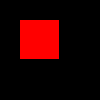

In [22]:
canal_negro = Image.new("L", dim_img)

R_RGB = Image.merge("RGB", (canal_R, canal_negro, canal_negro))
print('formato:', R_RGB.format)
print('(ancho, alto) =', R_RGB.size)
print('modo: ', R_RGB.mode)
print('bandas: ', R_RGB.getbands())
R_RGB

formato: None
(ancho, alto) = (100, 100)
modo:  RGB
bandas:  ('R', 'G', 'B')


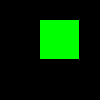

In [23]:
G_RGB = Image.merge("RGB", (canal_negro, canal_G, canal_negro))
print('formato:', G_RGB.format)
print('(ancho, alto) =', G_RGB.size)
print('modo: ', G_RGB.mode)
print('bandas: ', G_RGB.getbands())
G_RGB

formato: None
(ancho, alto) = (100, 100)
modo:  RGB
bandas:  ('R', 'G', 'B')


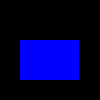

In [24]:
B_RGB = Image.merge("RGB", (canal_negro, canal_negro, canal_B))
print('formato:', B_RGB.format)
print('(ancho, alto) =', B_RGB.size)
print('modo: ', B_RGB.mode)
print('bandas: ', B_RGB.getbands())
B_RGB

#### Canal Alfa

Un **canal alfa** es un canal adicional que pueden tener tanto las imágenes RGB como las imágenes en niveles de gris para gestionar la luminancia de la imagen o de partes de ella. El **canal alfa tiene 8 bits de profundad** y da lugar a nuevos modos de imagen:
- RGBA (RGB + canal alfa)
- LA (L + canal alfa)

Un valor de 255 supone que la imagen mantiene inalterada su luminancia en ese píxel, mientras que un valor de 0 supone que ese píxel no tiene luminancia. Valores intermedios corresponden a luminancias para el píxel proporcionalemente intermedias.

Añadamos en primer lugar a nuestra imagen una canal alfa con un valor uniforme. Puedes cambiar el valor de alfa (entre 0 y 255), y ver cómo afecta a la luminancia. Ten en cuenta que si el fondo de la pantalla es blanco, es algo que tiene en cuenta el visualizador a la hora de mostrar la imagen RGBA. Por tanto, en tal caso, la luminancia nula va a aparecer blanca, como si no hubiera imagen o fuera totalmente transparente sobre fondo blanco.

In [25]:
# Creamos una nueva imagene RGB idéntica a la que teníamos
# pero en su propio espacio de memoria
img_RGBA = img_RGB.copy()

# Añadimos canal alfa y le damos un valos uniforme
alfa = 100 # valor entre 0 y 255
img_RGBA.putalpha(alfa) 

print('formato:', img_RGBA.format)
print('(ancho, alto) =', img_RGBA.size)
print('modo: ', img_RGBA.mode)
print('bandas: ', img_RGBA.getbands())

formato: None
(ancho, alto) = (100, 100)
modo:  RGBA
bandas:  ('R', 'G', 'B', 'A')


Imagen RGB inicial


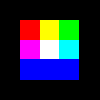

Imagen RGB con alfa =  100


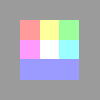

In [26]:
print('Imagen RGB inicial')
display(img_RGB)
print('Imagen RGB con alfa = ', alfa)
display(img_RGBA)

El canal alfa no tiene por qué ser uniforme, de hecho puede variar y es algo que se hace frecuentemente para conseguir efectos especiales al mezclar y combinar imágenes.

Veremos dos ejemplos, conde el canal alfa es, respectivamente:
- Un gradiente radial
- Y un gradiente lineal, de arriba a abajo

Estas imágenes de gradiente podemos obtenerlas fácilmente con funciones PILLOW de factoría, pero resultan imágenes de tamaño (256, 256). Por tanto, tendremos que redimensionarlas para hacerlas coincidir con el tamaño de la imagen RGB.

Veamos primero el canal alfa con gradiente radial:

(ancho, alto) = (256, 256)


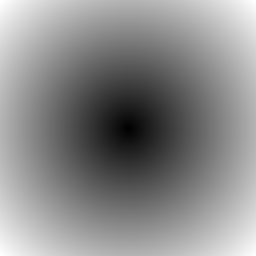

In [27]:
canal_A = Image.radial_gradient('L')
print('(ancho, alto) =', canal_A.size)
display(canal_A)

Reajustamos tamaño de canal A al de imagen RGB:  (100, 100)


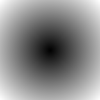

In [28]:
canal_A = canal_A.resize(img_RGB.size)
print('Reajustamos tamaño de canal A al de imagen RGB: ', img_RGB.size)
display(canal_A)

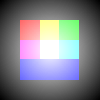

In [29]:
img_RGBA_rad = Image.merge("RGBA", (canal_R, canal_G, canal_B, canal_A))
display(img_RGBA_rad)

Y ahora vemos cómo resulta con el canal alfa con gradiente lineal:

(ancho, alto) = (256, 256)


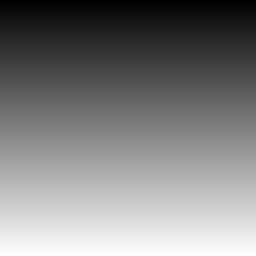

In [30]:
canal_A = Image.linear_gradient('L')
print('(ancho, alto) =', canal_A.size)
display(canal_A)

Reajustamos tamaño de canal A al de imagen RGB:  (100, 100)


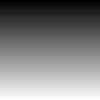

In [31]:
canal_A = canal_A.resize(img_RGB.size)
print('Reajustamos tamaño de canal A al de imagen RGB: ', img_RGB.size)
display(canal_A)

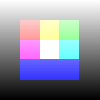

In [32]:
img_RGBA_lin = Image.merge("RGBA", (canal_R, canal_G, canal_B, canal_A))
display(img_RGBA_lin)

### Conclusión

PILLOW es muy potente para leer y convertir distintos formatos de imágenes. También permite hacer de foma sencilla algunas operaciones básicas, o combinaciones de éstas. Sin embargo, no es cómodo para acceder al interior de los canales y modificar selectivamente sus contenidos en distintas áreas de la imagen. 

Cuando queremos trabajar modificando arbitrariamente (editando) los contenidos de los canales es mejor recurrir a un paquete matemático, como veremos con Numpy y Matplotlib. 

En todo caso, PILLOW trabaja conjuntamente con dichos paquetes, y con muchos otros, especialmente a la hora de leer y escribir los ficheros de imagen. 

Para aprovechar la funcionalidad de entrada salida de PILLOW, podemos hacer lo siguiente:

In [33]:
Image.registered_extensions()

{'.bmp': 'BMP',
 '.dib': 'DIB',
 '.gif': 'GIF',
 '.jfif': 'JPEG',
 '.jpe': 'JPEG',
 '.jpg': 'JPEG',
 '.jpeg': 'JPEG',
 '.pbm': 'PPM',
 '.pgm': 'PPM',
 '.ppm': 'PPM',
 '.pnm': 'PPM',
 '.pfm': 'PPM',
 '.png': 'PNG',
 '.apng': 'PNG',
 '.blp': 'BLP',
 '.bufr': 'BUFR',
 '.cur': 'CUR',
 '.pcx': 'PCX',
 '.dcx': 'DCX',
 '.dds': 'DDS',
 '.ps': 'EPS',
 '.eps': 'EPS',
 '.fit': 'FITS',
 '.fits': 'FITS',
 '.fli': 'FLI',
 '.flc': 'FLI',
 '.ftc': 'FTEX',
 '.ftu': 'FTEX',
 '.gbr': 'GBR',
 '.grib': 'GRIB',
 '.h5': 'HDF5',
 '.hdf': 'HDF5',
 '.jp2': 'JPEG2000',
 '.j2k': 'JPEG2000',
 '.jpc': 'JPEG2000',
 '.jpf': 'JPEG2000',
 '.jpx': 'JPEG2000',
 '.j2c': 'JPEG2000',
 '.icns': 'ICNS',
 '.ico': 'ICO',
 '.im': 'IM',
 '.iim': 'IPTC',
 '.mpg': 'MPEG',
 '.mpeg': 'MPEG',
 '.tif': 'TIFF',
 '.tiff': 'TIFF',
 '.mpo': 'MPO',
 '.msp': 'MSP',
 '.palm': 'PALM',
 '.pcd': 'PCD',
 '.pdf': 'PDF',
 '.pxr': 'PIXAR',
 '.psd': 'PSD',
 '.qoi': 'QOI',
 '.bw': 'SGI',
 '.rgb': 'SGI',
 '.rgba': 'SGI',
 '.sgi': 'SGI',
 '.ras': 'SUN',